In [20]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [6]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/datasets/faces/final_files',
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    seed=12345
)

Found 7591 validated image filenames.


In [3]:
print(labels)

       file_name  real_age
0     000000.jpg         4
1     000001.jpg        18
2     000002.jpg        80
3     000003.jpg        50
4     000004.jpg        17
...          ...       ...
7586  007608.jpg        14
7587  007609.jpg        37
7588  007610.jpg        28
7589  007611.jpg        20
7590  007612.jpg        47

[7591 rows x 2 columns]


В выборке 7591 фотографий. Фотографии не разбиты на классы

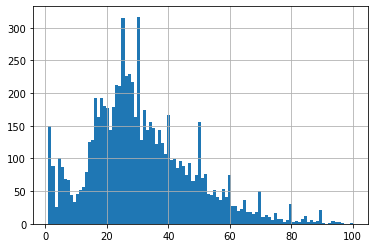

In [12]:
labels.real_age.hist(bins=100)

На гистограмме видим правал в диапазоне 8-14 лет

In [15]:
sample_images, _ = next(train_gen_flow)

In [26]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

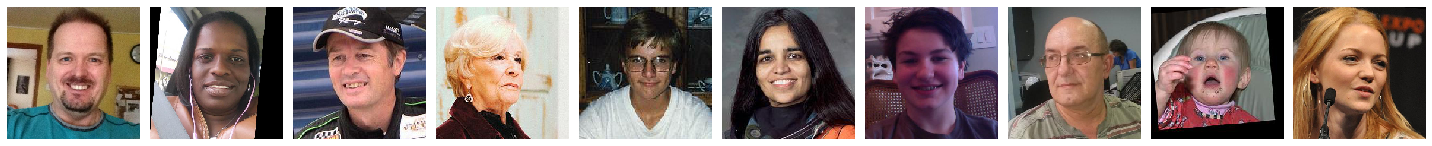

In [27]:
plotImages(sample_images)

В датасете действительно фотографии людей разных возрастов. Фотографии разного качества, с разными ракурсами. Люди разного пола, цвета кожи

Можно предположить, что нейросеть, обученная на этом датасете, будет лучше определять возраст в диапазоне 15-40 лет так как датасет перекошен